# Imports

In [13]:
import autograd.numpy as np
from autograd import grad 

import matplotlib.pyplot as plt

import pandas as pd

# Data Generation

In [14]:
import pandas as pd

data = {'x': [1, 2, 2, 3], 'y': [1, 1, 2, 2]}
df = pd.DataFrame(data)
x_ = df['x'].to_numpy()
y_ = df['y'].to_numpy()

# Linear Regression

$ f(x) = w^T \phi(x_i) $

Objective: $min_w \frac{1}{n} \sum_i^n(w^T \phi(x_i) - y_i)^2$, $\phi_1 = x$, $\phi_2= 1$
## 1. Pick the basis functions
Here we use a linear regression 1st order feature map(collection of basis functions)

In [15]:
def phi_1(x):
    return x
def phi_2(x):
    return 1

## 2. Calculate the feature map for each sample

In [16]:
basis_1_results = phi_1(df['x'].to_numpy())
basis_2_results = np.ones(len(basis_1_results))
feature_map_results = np.column_stack((basis_1_results, basis_2_results))

In [17]:
#E.G: The feature map for x_2
feature_map_results[2].shape

(2,)

## 3. Calculate min of derivative

$\frac{{\partial L(w)}}{{\partial w}} = \frac{2}{n} \sum_{i=1}^{n} \left(w^T \phi(x_i) - y_i\right) \cdot \phi(x_i)$

# 4. Gradient Descent

In [18]:
# Set variables
w = np.random.uniform(0, 10, size=(2, 1))
n = len(df['x'])
lr = 0.01
iter = 10000

values = []

In [19]:
print(f"Initial w: {w}")
for it in range(iter):

    # Derivative Calc
    sum = 0
    for i in range(feature_map_results.shape[0]):
        sum += ( np.dot(w.T, feature_map_results[i].reshape((2,1))) - y_[i] ) * feature_map_results[i].reshape((2,1))
    f_prime = 2 / n * sum

    # Gradient Descent
    w = w - lr * f_prime

    # Function Value
    values.append((it, np.sum(np.dot(w.T, feature_map_results.T))))

print(f"End w: {w}")

Initial w: [[9.73651204]
 [4.11484851]]
End w: [[0.5]
 [0.5]]


# Plotting GD

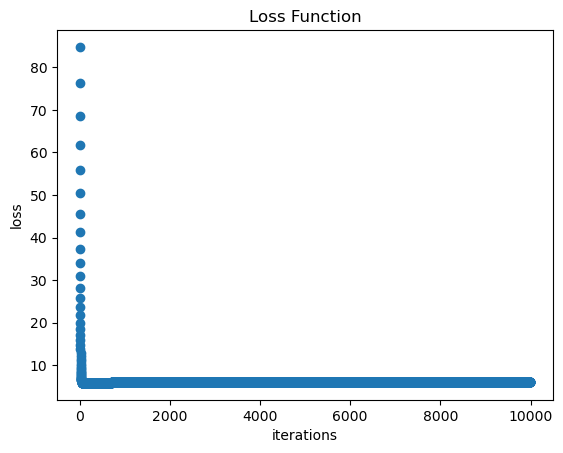

In [20]:
x, function = zip(*values)
plt.scatter(x, function)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('Loss Function')
plt.show()        
